In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Data Preprocessing


In [5]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'Sex' column
df.Sex = onehot_encoder.fit_transform(df[['Sex']])
df.Sex.value_counts()

c:\Users\sohil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.0    725
1.0    193
Name: Sex, dtype: int64

In [7]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [9]:
print(df['ChestPainType'].value_counts())
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

In [10]:
print(df['RestingECG'].value_counts())
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


1    552
0    188
2    178
Name: RestingECG, dtype: int64

In [11]:
print(df['ST_Slope'].value_counts())
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


1    460
2    395
0     63
Name: ST_Slope, dtype: int64

In [12]:
print(df['ExerciseAngina'].value_counts())
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64


0    547
1    371
Name: ExerciseAngina, dtype: int64

In [13]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0.0,1,140,289,0,1,172,0,0.0,2,0
1,49,1.0,2,160,180,0,1,156,0,1.0,1,1
2,37,0.0,1,130,283,0,2,98,0,0.0,2,0
3,48,1.0,0,138,214,0,1,108,1,1.5,1,1
4,54,0.0,2,150,195,0,1,122,0,0.0,2,0


In [14]:
df = df.set_index('Age') 
df.head()

,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,,,,,,,,,,,
40,0.0,1,140,289,0,1,172,0,0.0,2,0
49,1.0,2,160,180,0,1,156,0,1.0,1,1
37,0.0,1,130,283,0,2,98,0,0.0,2,0
48,1.0,0,138,214,0,1,108,1,1.5,1,1
54,0.0,2,150,195,0,1,122,0,0.0,2,0


## Remove Outliers

In [15]:
def Draw_Boxplot(data, y):
    sns.boxenplot(data = data, y = y )
    plot.title(y)
    plot.show()

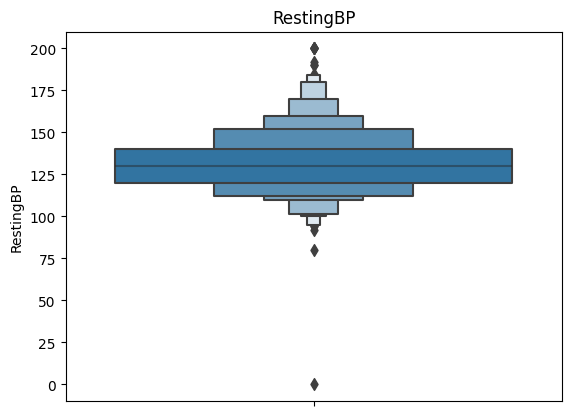

In [16]:
Draw_Boxplot(df, 'RestingBP')

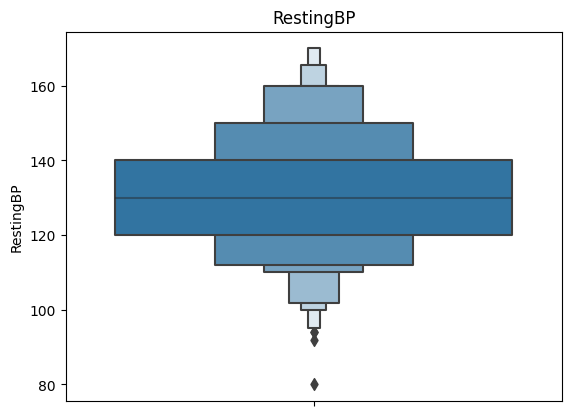

In [17]:
df=df[(df['RestingBP']>=80)&(df['RestingBP']<=170)] 
Draw_Boxplot(df, 'RestingBP')

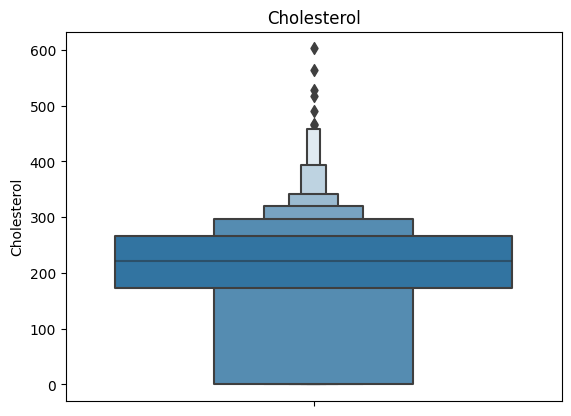

In [18]:
Draw_Boxplot(df, 'Cholesterol')


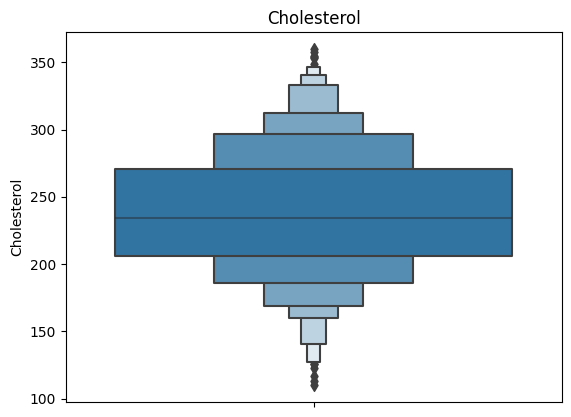

In [19]:
df=df[(df['Cholesterol']<=360)&(df['Cholesterol']>=110)] 
Draw_Boxplot(df, 'Cholesterol')

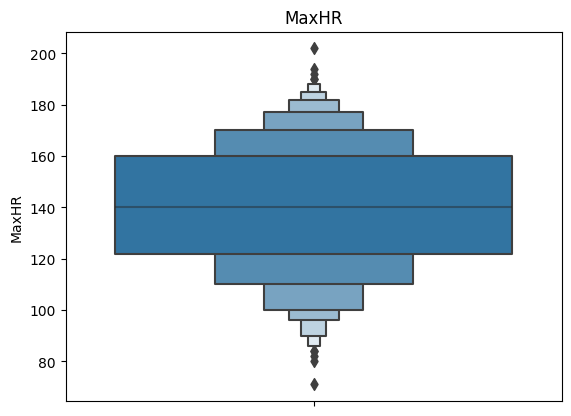

In [20]:
Draw_Boxplot(df,'MaxHR')

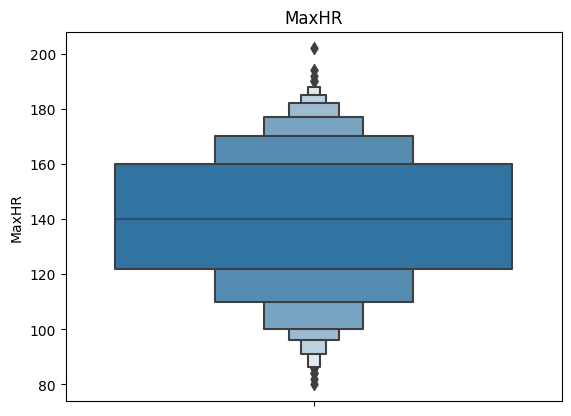

In [21]:
df=df[(df['MaxHR']>=75)] 
Draw_Boxplot(df,'MaxHR')

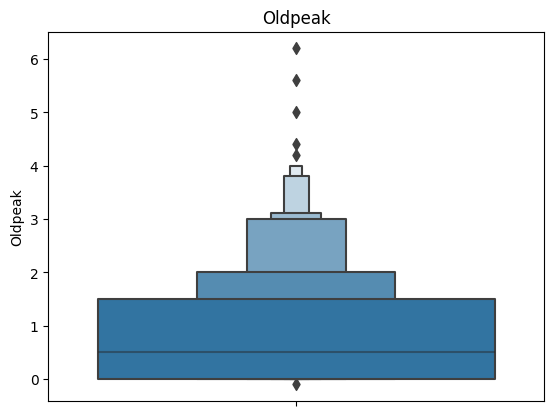

In [22]:
Draw_Boxplot(df,'Oldpeak')

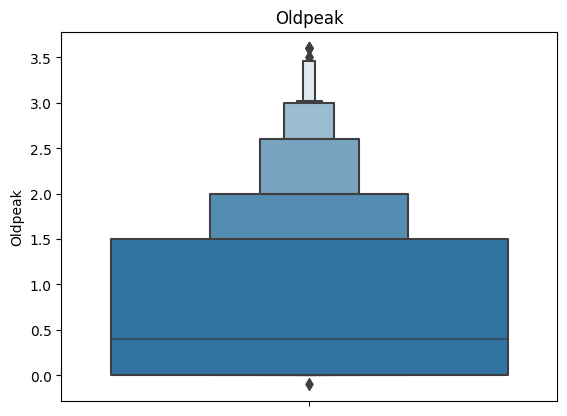

In [23]:
df=df[(df['Oldpeak']>=-2)&(df['Oldpeak']<=3.7)] 
Draw_Boxplot(df,'Oldpeak')

In [24]:
df['HeartDisease'].value_counts()

0    371
1    318
Name: HeartDisease, dtype: int64

## Model Creation

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import svm

In [26]:
x = df.drop('HeartDisease', axis = 1)
y = df.HeartDisease
print(x.shape)
print(y.shape)

(689, 10)
(689,)


In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, 
random_state=0)

In [28]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(482, 10) (482,)
(207, 10) (207,)


In [29]:
# Model
clf = svm.LinearSVC(dual=False)

In [30]:
SVM = svm.LinearSVC(dual = False)
SVM

LinearSVC(dual=False)

In [31]:
SVM.fit(X_train, y_train)

LinearSVC(dual=False)

In [32]:
y_pred = SVM.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       109
           1       0.85      0.90      0.88        98

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100

# Print accuracy rounded to 2 decimal places
print(f'Accuracy of the model: {round(accuracy, 2)}%')

Accuracy of the model: 87.92%
